# Covid19 en Bs. As.

> Aplicamos el metodo de [babino2020masks](https://github.com/ababino/babino2020masks) a datos de la ciudad de buenos aires

## Install

`pip install babino2020masks`

## Import

In [ ]:
import numpy as np
import pandas as pd
from fastcore.all import *
from babino2020masks.core import *
from babino2020masks.lasso import *
from covid19bsas.core import *

## Get the Data

In [ ]:
df = get_bsas_data2()

## Plot

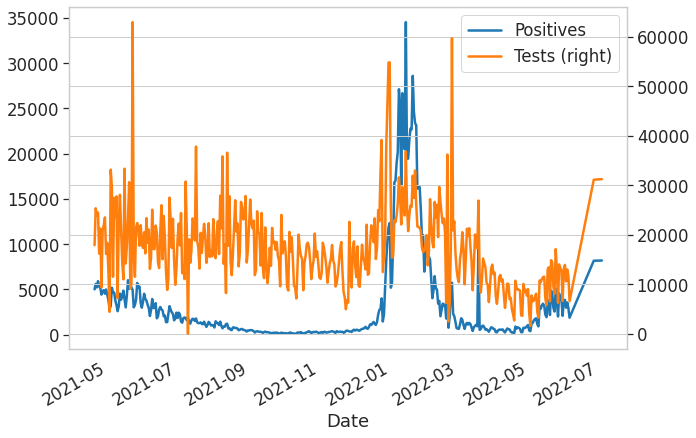

In [ ]:
df.plot(x='Date', y=['Positives', 'Tests'], secondary_y=['Tests'], figsize=(10, 7));

/opt/hostedtoolcache/Python/3.8.13/x64/lib/python3.8/site-packages/babino2020masks/core.py:156: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim([0.9*min_y, 1.1*max_y])


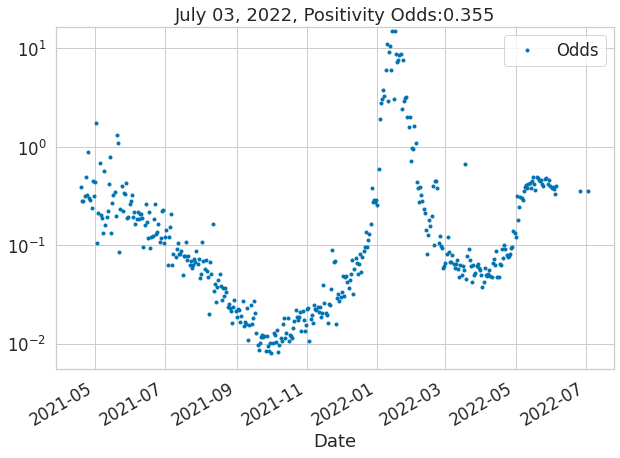

In [ ]:
ax = plot_data_and_fit(df, 'Date', 'Odds', None, None, None, figsize=(10, 7))
ax.set_title(f'{df.tail(1).Date.iloc[0]:%B %d, %Y}, Positivity Odds:{df.tail(1).Odds.values[0]:2.3}');

In [ ]:
sdf = df.replace([np.inf, -np.inf], np.nan).dropna().copy()
lics = LassoICSelector(sdf['Odds'], 'bic')
lics.fit_best_alpha()

/opt/hostedtoolcache/Python/3.8.13/x64/lib/python3.8/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


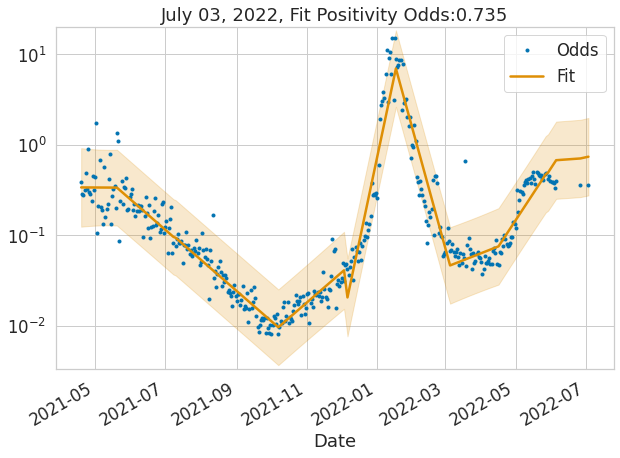

In [ ]:
#plt.close('all')
sdf['Fit'], sdf['Odds_l'], sdf['Odds_u'] = lics.odds_hat_l_u()
ax = plot_data_and_fit(sdf, 'Date', 'Odds', 'Fit', 'Odds_l', 'Odds_u', figsize=(10, 7))
ax.set_title(f'{sdf.tail(1).Date.iloc[0]:%B %d, %Y}, Fit Positivity Odds:{sdf.tail(1).Fit.values[0]:2.3}');
#plt.xlim([sdf.Date.min(), sdf.Date.max()])
#plt.show()

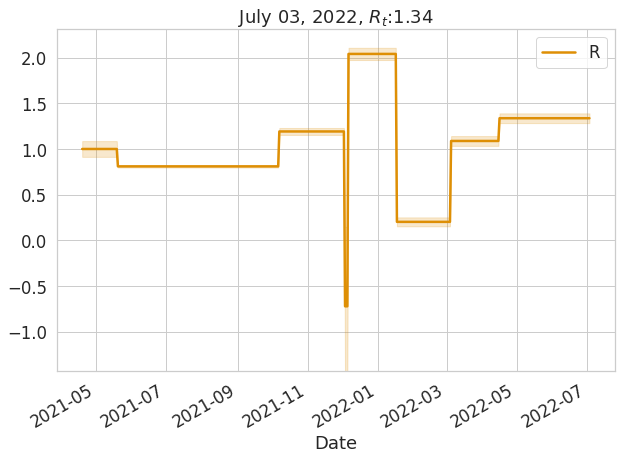

In [ ]:
sdf['R'], sdf['Rl'], sdf['Ru'] = lics.rt()
ax = plot_data_and_fit(sdf[(sdf.Ru-sdf.Rl).gt(0)], 'Date', None, 'R', 'Rl', 'Ru', figsize=(10, 7), logy=False, palette=[colorblind[1],colorblind[1]])
ax.set_title(f'{sdf.tail(1).Date[0]:%B %d, %Y}, $R_t$:{sdf.tail(1).R.values[0]:2.3}');